In [112]:
import csv
import pandas as pd
import numpy as np

# 1-1

# import csv and read as list
my_file = open("groceries.csv", 'r')
reader = csv.reader(my_file, delimiter=',')
dataset = list(reader)

# convert transactional data into tabular format binary variables
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
groceries = pd.DataFrame(te_ary, columns=te.columns_)


In [113]:
# 1-2 
groceries.sum().sort_values()

baby food                   1
sound storage medium        1
preservation products       2
kitchen utensil             4
bags                        4
                         ... 
soda                     1715
rolls/buns               1809
other vegetables         1903
whole milk               2513
                         9834
Length: 170, dtype: int64

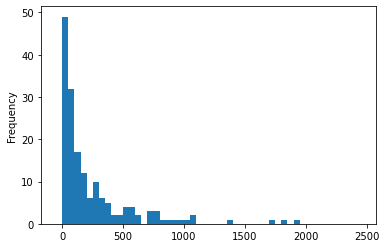

In [114]:
popular = groceries.sum()
bin_values = np.arange(start=-50, stop=2500, step=50)
pd.Series(popular).plot(kind='hist', bins=bin_values)

In [115]:
# 2-1 
import pandas as pd
from mlxtend.frequent_patterns import apriori

frequent_itemsets=apriori(groceries, min_support=0.04, use_colnames=True)

# add a new column that stores the length of each itemset:
#frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets
0,0.999898,()
1,0.052466,(beef)
2,0.080529,(bottled beer)
3,0.110524,(bottled water)
4,0.064870,(brown bread)
...,...,...
78,0.056533,"(, whole milk, rolls/buns)"
79,0.048805,"(, whole milk, root vegetables)"
80,0.040061,"(, soda, whole milk)"
81,0.042196,"(, tropical fruit, whole milk)"


In [99]:
# 2-1
from mlxtend.frequent_patterns import association_rules

#association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)

# compute the antecedent length:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.sort_values(by=['lift'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
18,(other vegetables),"(, whole milk)",0.193493,0.255414,0.074733,0.386232,1.512179,0.025312,1.213139,1
17,"(, whole milk)",(other vegetables),0.255414,0.193493,0.074733,0.292596,1.512179,0.025312,1.140094,2
16,"(, other vegetables)",(whole milk),0.193391,0.255516,0.074733,0.386435,1.512372,0.025319,1.213375,2
19,(whole milk),"(, other vegetables)",0.255516,0.193391,0.074733,0.292479,1.512372,0.025319,1.140050,1
3,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548,1
2,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013,1
32,"(, whole milk)",(yogurt),0.255414,0.139502,0.055923,0.218949,1.569507,0.020292,1.101718,2
35,(yogurt),"(, whole milk)",0.139502,0.255414,0.055923,0.400875,1.569507,0.020292,1.242788,1
34,(whole milk),"(, yogurt)",0.255516,0.139400,0.055923,0.218862,1.570027,0.020304,1.101726,1
33,"(, yogurt)",(whole milk),0.139400,0.255516,0.055923,0.401167,1.570027,0.020304,1.243225,2


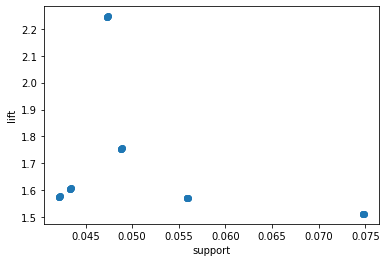

In [100]:
#2-2
import matplotlib.pyplot as plt

plt.scatter(rules['support'],rules['lift'])
plt.xlabel('support')
plt.ylabel('lift')
plt.show()

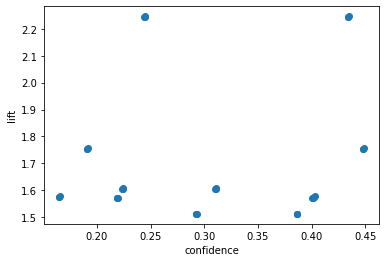

In [101]:
plt.scatter(rules['confidence'],rules['lift'])
plt.xlabel('confidence')
plt.ylabel('lift')
plt.show()

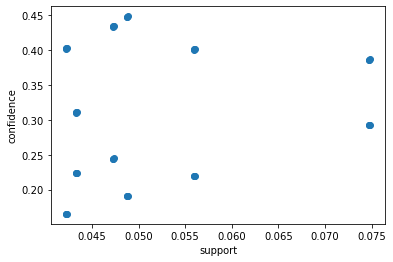

In [102]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [103]:
# 2-3
rules.sort_values(by=['confidence'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
31,(whole milk),"(, tropical fruit)",0.255516,0.104830,0.042196,0.165141,1.575329,0.015411,1.072242,1
29,"(, whole milk)",(tropical fruit),0.255414,0.104931,0.042196,0.165207,1.574429,0.015395,1.072204,2
9,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631,1
26,(whole milk),"(, root vegetables)",0.255516,0.108897,0.048805,0.191007,1.754016,0.020980,1.101496,1
24,"(, whole milk)",(root vegetables),0.255414,0.108998,0.048805,0.191083,1.753078,0.020966,1.101474,2
6,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913,1
34,(whole milk),"(, yogurt)",0.255516,0.139400,0.055923,0.218862,1.570027,0.020304,1.101726,1
32,"(, whole milk)",(yogurt),0.255414,0.139502,0.055923,0.218949,1.569507,0.020292,1.101718,2
11,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157,1
22,(other vegetables),"(, yogurt)",0.193493,0.139400,0.043315,0.223857,1.605860,0.016342,1.108816,1


In [111]:
# 2-4
rules[rules.iloc[:,5]>= 0.4 ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693,1
7,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401,1
8,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252,1
10,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132,1
13,"(, root vegetables)",(other vegetables),0.108897,0.193493,0.047280,0.434174,2.243877,0.026209,1.425362,2
15,(root vegetables),"(, other vegetables)",0.108998,0.193391,0.047280,0.433769,2.242963,0.026201,1.424522,1
25,"(, root vegetables)",(whole milk),0.108897,0.255516,0.048805,0.448179,1.754016,0.020980,1.349141,2
27,(root vegetables),"(, whole milk)",0.108998,0.255414,0.048805,0.447761,1.753078,0.020966,1.348304,1
28,"(, tropical fruit)",(whole milk),0.104830,0.255516,0.042196,0.402522,1.575329,0.015411,1.246044,2
30,(tropical fruit),"(, whole milk)",0.104931,0.255414,0.042196,0.402132,1.574429,0.015395,1.245401,1
